In [1]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56            132        352  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           7633        142  1.0              
damirdizdarevic/uefa-euro-2024-players                               UEFA EURO 2024 - Players                          15KB  2024-06-08 18:07:29           1410         32  1.0              
informrohit1/smartphones-dataset                  

In [5]:
! kaggle competitions download -c dogs-vs-cats

 99% 800M/812M [00:09<00:00, 148MB/s]
100% 812M/812M [00:09<00:00, 85.6MB/s]


In [60]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [61]:
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [62]:
! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [63]:
import csv
import itertools
import os
import random
import re
import zipfile

from subprocess import check_output

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import skimage as ski
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from numpy import array
from PIL import Image, ImageFilter
from sklearn.calibration import CalibratedClassifierCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
from skimage.io import imread
from skimage.transform import resize


In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [65]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [66]:
TRAIN_DIR_PATH = 'train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 25003 number of images in directory.


In [67]:
TRAIN_DIR_PATH = 'test1'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

There are 12500 number of images in directory.


In [70]:
IMAGE_FOLDER_PATH = "train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)

In [71]:
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target
for file_name in FILE_NAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)

    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)

    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [72]:
train_cats_dir[:5]

['train/cat.8399.jpg',
 'train/cat.5107.jpg',
 'train/cat.3441.jpg',
 'train/cat.1268.jpg',
 'train/cat.2686.jpg']

In [73]:
train_dogs_dir[:5]

['train/dog.10867.jpg',
 'train/dog.6113.jpg',
 'train/dog.9877.jpg',
 'train/dog.4614.jpg',
 'train/dog.10592.jpg']

In [74]:
dataset.head()

image_path target
0  train/dog.10867.jpg    dog
1   train/dog.6113.jpg    dog
2   train/cat.8399.jpg    cat
3   train/cat.5107.jpg    cat
4   train/cat.3441.jpg    cat

In [75]:
len(dataset)

25003

In [76]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 25003
target
dog                 12500
cat                 12500
sampleSubmission        1
test1                   1
train                   1
Name: count, dtype: int64


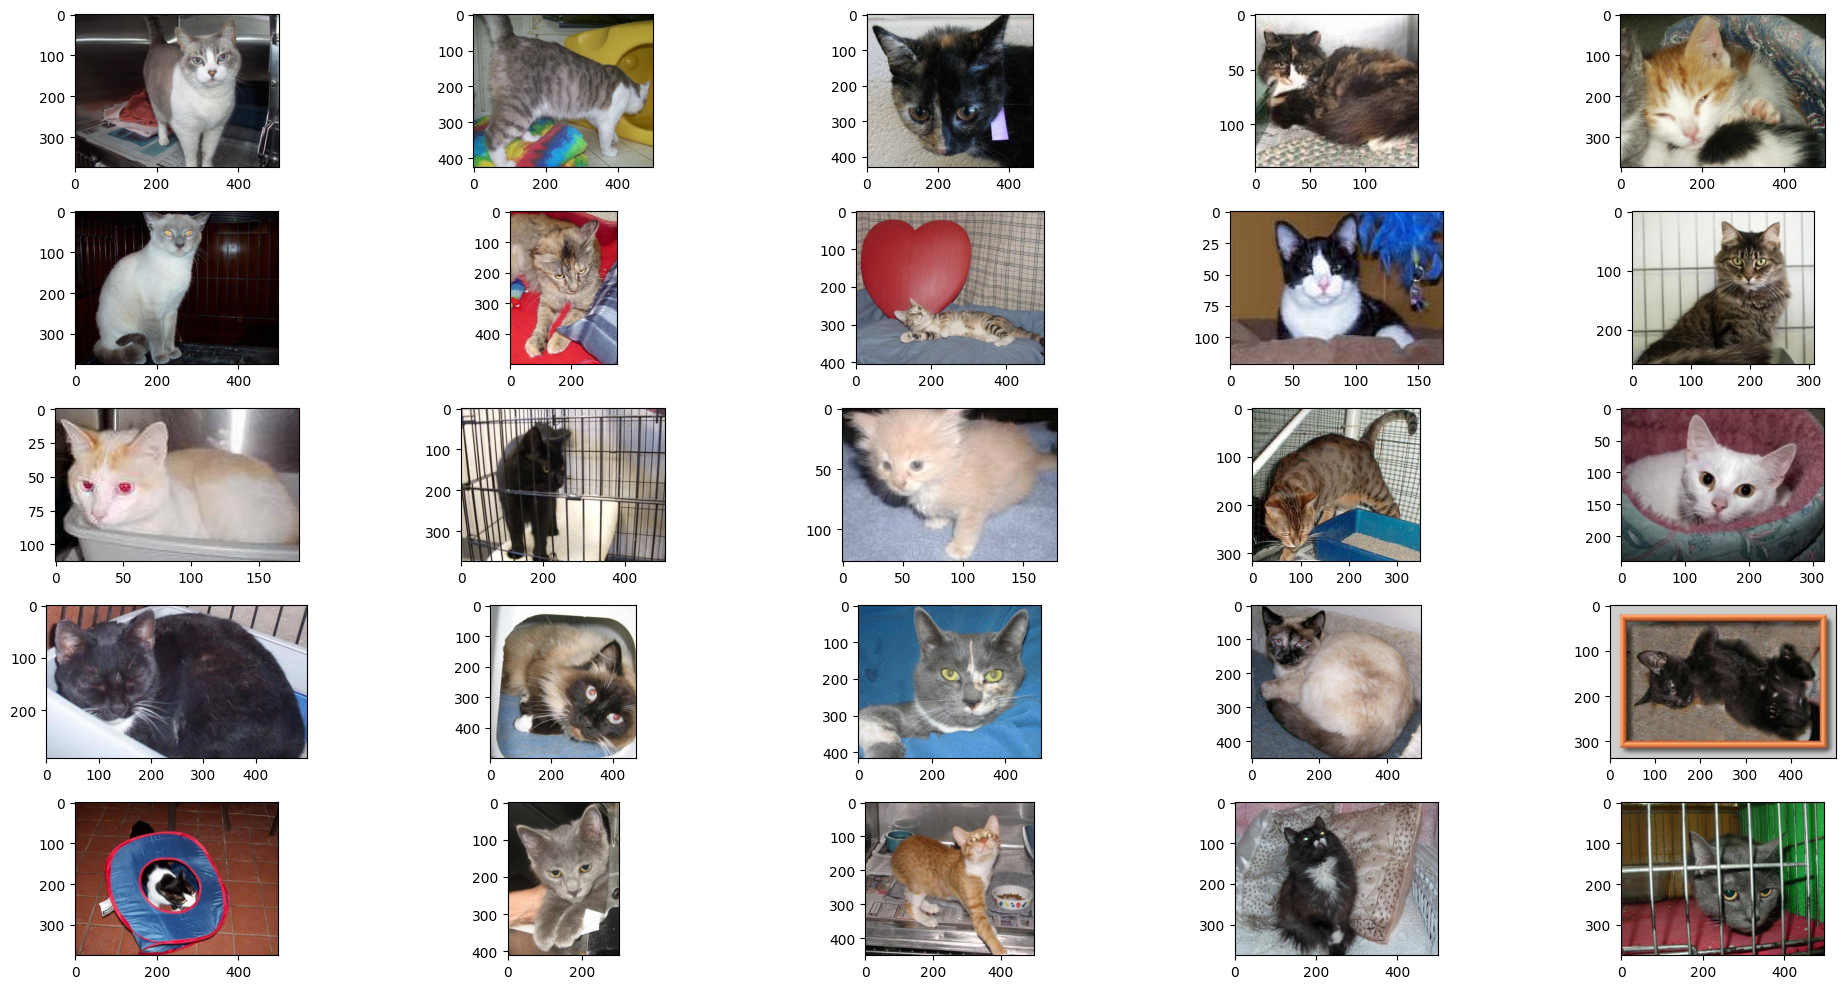

In [77]:
rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = mpimg.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1

fig.tight_layout()
plt.show()

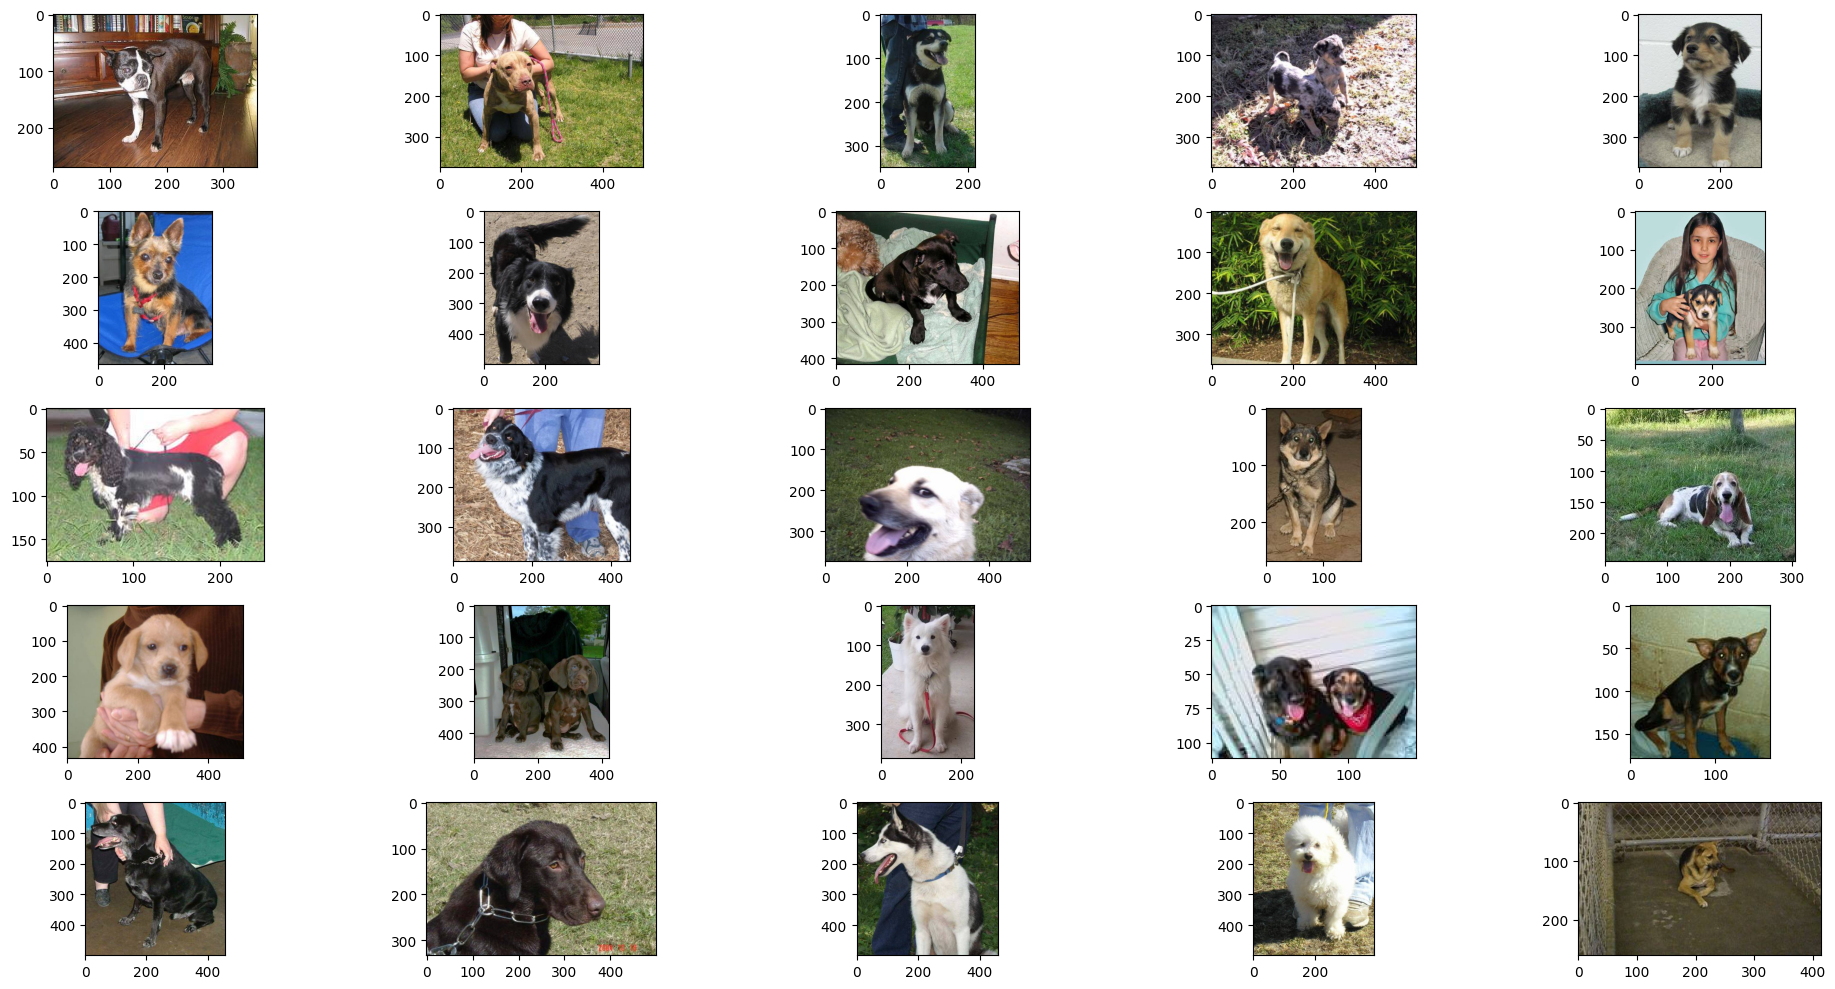

In [78]:
rows = 5
cols = 5
axes = []
fig=plt.figure(figsize=(20,10))
i = 0

for a in range(rows*cols):
    b = mpimg.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1

fig.tight_layout()
plt.show()

In [81]:
train, test_val = train_test_split(dataset, test_size=0.2, random_state=20)
test, val = train_test_split(test_val, test_size=0.5, random_state=20)

In [82]:
train.shape, test_val.shape

((20002, 2), (5001, 2))

In [83]:
target_distribution =test['target'].value_counts()
target_distribution.head(10)

target
dog    1279
cat    1221
Name: count, dtype: int64

In [84]:
TEST_DIR = 'test1/'
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [85]:
dataset

image_path target
0      train/dog.10867.jpg    dog
1       train/dog.6113.jpg    dog
2       train/cat.8399.jpg    cat
3       train/cat.5107.jpg    cat
4       train/cat.3441.jpg    cat
...                    ...    ...
24998  train/cat.11535.jpg    cat
24999  train/cat.10729.jpg    cat
25000   train/cat.6814.jpg    cat
25001   train/cat.1828.jpg    cat
25002  train/dog.10189.jpg    dog

[25003 rows x 2 columns]

In [98]:
dataset=dataset[:10]
test_images=test_images[:10]
dataset

image_path target
0  train/dog.10867.jpg    dog
1   train/dog.6113.jpg    dog
2   train/cat.8399.jpg    cat
3   train/cat.5107.jpg    cat
4   train/cat.3441.jpg    cat
5   train/dog.9877.jpg    dog
6   train/cat.1268.jpg    cat
7   train/dog.4614.jpg    dog
8  train/dog.10592.jpg    dog
9   train/dog.6404.jpg    dog

In [99]:
def preprocess_image(image_path):
    img = imread(image_path)
    # Resize the image to a fixed size
    img = resize(img, (100, 100))
    # Flatten the image to a 1D array
    img_flat = img.flatten()
    return img_flat

In [100]:
X = []
y = dataset['target']
for image_path in dataset['image_path']:
    X.append(preprocess_image(image_path))
X = np.array(X)

In [109]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [104]:
clf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train)

SVC()

In [105]:
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [106]:
X_test = []
for image_path in test_images:
    img = preprocess_image(image_path)
    X_test.append(img)
X_test = np.array(X_test)

X_test_pca = pca.transform(X_test)

In [107]:
test_predictions = clf.predict(X_test_pca)

test_predictions_mapped = [1 if label == 'dog' else 0 for label in test_predictions]

predictions_df = pd.DataFrame({'id': range(1, len(test_predictions_mapped) + 1), 'label': test_predictions_mapped})

predictions_df.to_csv('svm_test_predictions.csv', index=False)

predictions_df

id  label
0   1      1
1   2      1
2   3      1
3   4      1
4   5      0
5   6      1
6   7      0
7   8      0
8   9      1
9  10      1